<a href="https://colab.research.google.com/github/Bobby9800/STATSANDSCANS/blob/main/TitanicBooka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

# Setting the aesthetics for the plots


In [2]:
sns.set(style="whitegrid")

In [3]:
# Load the Titanic dataset
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
# Fill missing values
data['age'].fillna(data['age'].median(), inplace=True)
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

# Drop columns with too many missing values or irrelevant data
data.drop(['deck', 'embark_town', 'alive'], axis=1, inplace=True)

# Encode categorical variables
label_enc = LabelEncoder()
data['sex'] = label_enc.fit_transform(data['sex'])
data['embarked'] = label_enc.fit_transform(data['embarked'])
data['who'] = label_enc.fit_transform(data['who'])
data['class'] = label_enc.fit_transform(data['class'])
data['alone'] = label_enc.fit_transform(data['alone'])

data.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,1


In [7]:
# Select features and target variable
X = data.drop('survived', axis=1)
y = data['survived']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [8]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions and evaluation
y_pred_log_reg = log_reg.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.8208955223880597
[[138  19]
 [ 29  82]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       157
           1       0.81      0.74      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



In [5]:
# Check for missing values
print(data.isnull().sum())

# Descriptive statistics
print(data.describe())

# Categorical data distribution
print(data['sex'].value_counts())
print(data['class'].value_counts())


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [9]:
# Decision Tree
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred_tree = tree_clf.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree)}")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Decision Tree Accuracy: 0.7835820895522388
[[130  27]
 [ 31  80]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       157
           1       0.75      0.72      0.73       111

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.78      0.78      0.78       268



In [10]:
# Random Forest
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred_forest = forest_clf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_forest)}")
print(confusion_matrix(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))


Random Forest Accuracy: 0.7947761194029851
[[133  24]
 [ 31  80]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       157
           1       0.77      0.72      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.79      0.79      0.79       268



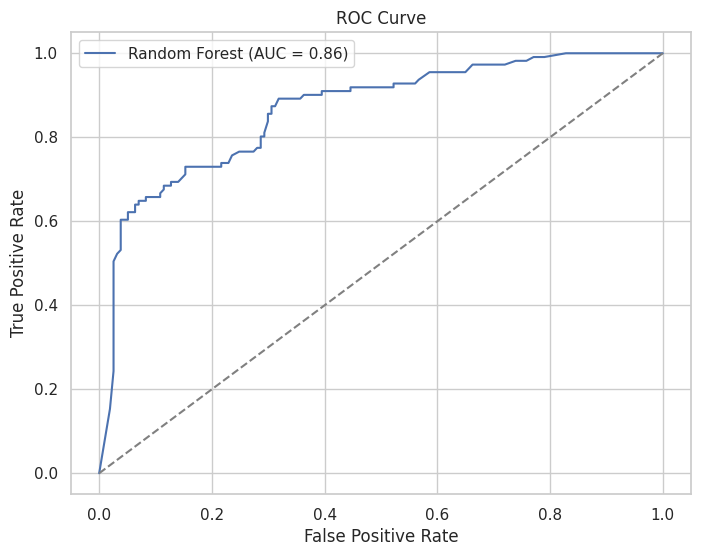

In [11]:
# ROC Curve and AUC
y_prob_forest = forest_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_forest)
auc_score = roc_auc_score(y_test, y_prob_forest)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


<ipython-input-4-43ead33aa476>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='survived', y='who', inner='box', palette='Dark2')


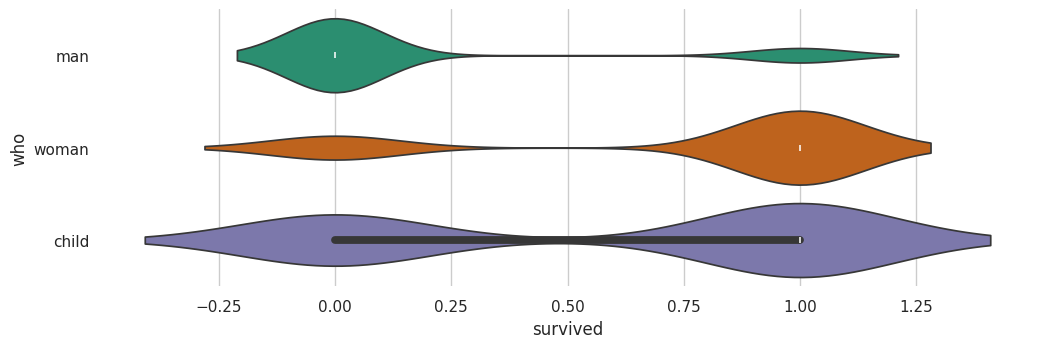

In [4]:
# @title who vs survived

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['who'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='survived', y='who', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)